<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>Regularization</b></p>

# <font color='#skyblue'> <b>Importing Libraries</b><font color='black'>  

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from skimpy import skim

from sklearn.model_selection import train_test_split                              # for train-test split
from sklearn.linear_model import LinearRegression                                 # for Linear Regression model fitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score     # for error metrics
from sklearn.preprocessing import PolynomialFeatures                              # for polynomial conversion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler      # for scaling
from sklearn.model_selection import cross_validate, cross_val_score               # for cross validate (CV)
from sklearn.model_selection import GridSearchCV                                  # for Grid Search
from sklearn.linear_model import Ridge, Lasso, ElasticNet                         # for regularization

plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

# <font color='#skyblue'> <b>Loading Dataset</b><font color='black'>  

In [9]:
df = pd.read_csv("Advertising.csv")

# <font color='#skyblue'> <b>EDA</b><font color='black'>  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [25]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25     ┃ p50     ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ TV              │   0 │      0 │     147 │   85.85 │   0.7 │   74.38 │   149.8 │  218.8 │  296.4 │ ▆▆▅▅▇▅  │  │
│ │ radio           │   0 │      0 │   23.26 │   14.85 │     0 │   9.975 │    22.9 │  36.52 │   49.6 │ ▇▆▅▆▆▆  │  │
│ │ newspaper       │   0 │      0 │   30.55 │   21.78 │   0.3 │   12.75 │   25.75 │   45.1 │    114 │  ▇▇▅▂   │  │
│ │ sales           │   0 │      0 │   14.02 │   5.217 │   1.6 │   10.38 │    12.9 │   17.4 │     27 │ ▁▅▇▅▃▂  │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴───────┴─────────┴─────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

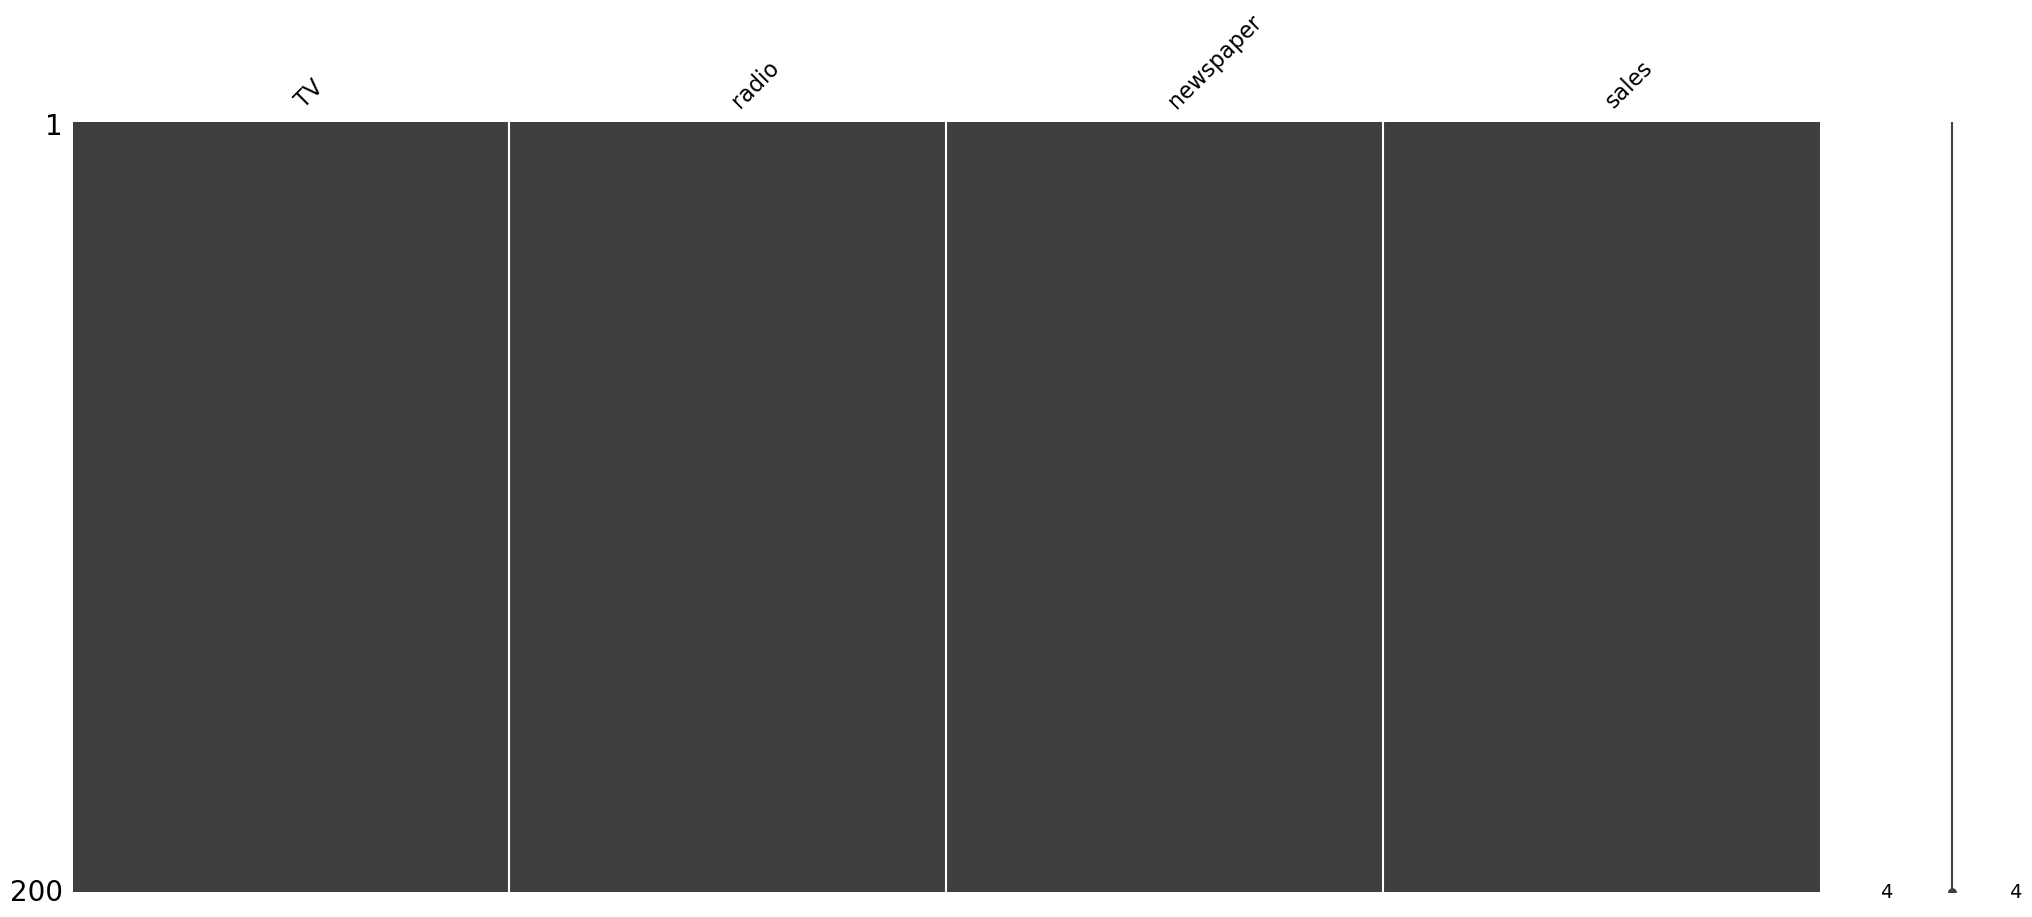

In [27]:
msno.matrix(df);

# <font color='#skyblue'> <b>Defining X and y</b><font color='black'>  

In [30]:
# defining X and y
X = df.drop(columns= "sales")
y = df["sales"]

In [32]:
# we do this to increase the complexity of the model. It is not used much in real life. //
# // It can be used in academic research when there is insufficient data.
polynomial_converter = PolynomialFeatures(degree=5, include_bias= False)

poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 55)

# <font color='#skyblue'> <b>Train-Test Split</b><font color='black'>  

In [56]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# <font color='#skyblue'> <b>Scaling</b><font color='black'>  

**!!! SCALING IS APPLIED TO X ONLY. DOES NOT APPLY TO y !!!**

## <font color='skyblue'> <b>StandartScaler</b><font color='black'>  
Scales the data to have a mean of zero and a standard deviation of one.

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # fit() yalnızca train'e uygulanır

## <font color='skyblue'> <b>MinMaxScaler</b><font color='black'>  
Scales data to a specific range (for example, 0-1).

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <font color='#skyblue'> <b>Modeling</b><font color='black'>  

## <font color='skyblue'> <b>Linear Regression Model</b><font color='black'>  

In [60]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
y_train_pred = lm.predict(X_train_scaled)
y_pred = lm.predict(X_test_scaled)

In [66]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [68]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls # values before CV

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


In [70]:
# Cross Validate (CV)
model = LinearRegression()

scores = cross_validate(estimator=model, X= X_train_scaled, y=y_train,
               scoring= ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
               cv=10,
               return_train_score=True
              )

scores = pd.DataFrame(scores, index= range(1,11))
scores.iloc[:, 2:].mean() # values after CV

test_r2                              0.842033
train_r2                             0.997797
test_neg_mean_absolute_error        -0.611475
train_neg_mean_absolute_error       -0.180847
test_neg_mean_squared_error         -3.863458
train_neg_mean_squared_error        -0.057904
test_neg_root_mean_squared_error    -1.227496
train_neg_root_mean_squared_error   -0.240493
dtype: float64

In [ ]:
# We always reset the model before every Cross Validation. Otherwise, there is a danger of dataleakage.

# Overfitting control will be done within the train set.
# It is determined whether there is overfitting by comparing the scores obtained by taking the average of the validation and train sets we will obtain from the train set.

# Select return_train_score=True to get the train scores in each iteration of the CV.

## <font color='skyblue'> <b>Ridge Model</b><font color='black'>  

In [72]:
alpha_space = np.linspace(0.01, 1, 100)
param_grid = {"alpha": alpha_space}

ridge_model = Ridge()
grid_ridge = GridSearchCV(estimator= ridge_model,
                          param_grid= param_grid,
                          scoring= "neg_root_mean_squared_error",
                          cv= 10,
                          verbose= 1,
                          return_train_score= True
                         )
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [74]:
grid_ridge.best_params_

{'alpha': 0.02}

In [76]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [78]:
rm = Ridge(alpha= 0.02).fit(X_train_scaled, y_train)

# Since grid models do not have the coef_ feature, we rebuild the model with the best hyperparameter.

In [80]:
rm = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rm

,ridge_train,ridge_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


## <font color='skyblue'> <b>Lasso Model</b><font color='black'>  

In [82]:
lasso_model = Lasso()
param_grid = {"alpha": alpha_space}
grid_lasso = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          verbose=1,
                          return_train_score=True
                         )
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [84]:
grid_lasso.best_params_

{'alpha': 0.01}

In [86]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [88]:
lss = Lasso(alpha= 0.01).fit(X_train_scaled, y_train)

# Since grid models do not have the coef_ feature, we rebuild the model with the best hyperparameter.

In [90]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


## <font color='skyblue'> <b>Elastic-Net Model</b><font color='black'>  

In [92]:
elastic_model = ElasticNet()
param_grid = {"alpha":[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            "l1_ratio":[0.1, 0.25, 0.5, 0.75, 0.9, 1]}
grid_model = GridSearchCV(estimator = elastic_model,
                          param_grid = param_grid,
                          scoring = 'neg_root_mean_squared_error',
                         cv =10,
                          verbose =1,
                          return_train_score=True
                         )
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [94]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [96]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [98]:
ens = ElasticNet(alpha= 0.01, l1_ratio=1).fit(X_train_scaled, y_train)

# Since grid models do not have the coef_ feature, we rebuild the model with the best hyperparameter.

In [100]:
ens = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
ens

,elastic_train,elastic_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


# <font color='#skyblue'> <b>Final Model</b><font color='black'>  

In [102]:
# We combine the scores of all models made with concat.
pd.concat([ls, rm, lss, ens], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.994491,0.983643,0.988820,0.986283,0.988820,0.986283
mae,0.186213,0.665959,0.244842,0.442087,0.339185,0.441091,0.339185,0.441091
mse,0.062968,6.634847,0.144977,0.461803,0.294202,0.387259,0.294202,0.387259
rmse,0.250934,2.575820,0.380758,0.679561,0.542404,0.622302,0.542404,0.622302


In [ ]:
# we can choose lasso for final model!

In [106]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

# Since we will train our final model with all the data, we scale all the data.

In [108]:
final_model = Lasso(alpha= 0.01) # Since the best alpha value in grid_lasso is 0.01, we write it.
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

# <font color='#skyblue'> <b>Prediction</b><font color='black'>  

In [110]:
new_sample = [[50, 75, 125]]

# We created a new sample as if we were getting new data from outside.
# Since there are 3 features in the main data set, 3 values ​​were entered.
# Then we will do polynomial conversion as we did in the beginning.

poly_sample = polynomial_converter.transform(new_sample)
poly_sample

# The number of features of the data we will receive as a prediction must be the same as the number of features the model has been trained with.
# For this reason, we transform our new observation into poly features over degree 5, as in our training data.

# Remember that the polynomial_converter variable is the algorithm that converts our data to poly feature at degree 5 at the beginning of the notebook.
# Here, we can transform our new observation into poly features by simply transforming.

array([[5.00000000e+01, 7.50000000e+01, 1.25000000e+02, 2.50000000e+03,
        3.75000000e+03, 6.25000000e+03, 5.62500000e+03, 9.37500000e+03,
        1.56250000e+04, 1.25000000e+05, 1.87500000e+05, 3.12500000e+05,
        2.81250000e+05, 4.68750000e+05, 7.81250000e+05, 4.21875000e+05,
        7.03125000e+05, 1.17187500e+06, 1.95312500e+06, 6.25000000e+06,
        9.37500000e+06, 1.56250000e+07, 1.40625000e+07, 2.34375000e+07,
        3.90625000e+07, 2.10937500e+07, 3.51562500e+07, 5.85937500e+07,
        9.76562500e+07, 3.16406250e+07, 5.27343750e+07, 8.78906250e+07,
        1.46484375e+08, 2.44140625e+08, 3.12500000e+08, 4.68750000e+08,
        7.81250000e+08, 7.03125000e+08, 1.17187500e+09, 1.95312500e+09,
        1.05468750e+09, 1.75781250e+09, 2.92968750e+09, 4.88281250e+09,
        1.58203125e+09, 2.63671875e+09, 4.39453125e+09, 7.32421875e+09,
        1.22070312e+10, 2.37304688e+09, 3.95507812e+09, 6.59179688e+09,
        1.09863281e+10, 1.83105469e+10, 3.05175781e+10]])

In [112]:
scaled_sample = final_scaler.transform(poly_sample)

# Since our trained data is scaled, the data we will use for prediction should also be scaled according to the information of the training train data.

In [114]:
y_pred2 = final_model.predict(scaled_sample)
y_pred2

array([16.63970974])

We saw that if we receive new data as **new_sample = [[50, 75, 125]]** after creating the model, the estimated ad sales to be obtained with these values ​​will be **16.63970974**.

# <font color='#skyblue'> <b>Feature Importance</b><font color='black'>  

Since we chose the final model as **Lasso**, we will make Future Importance according to Lasso.

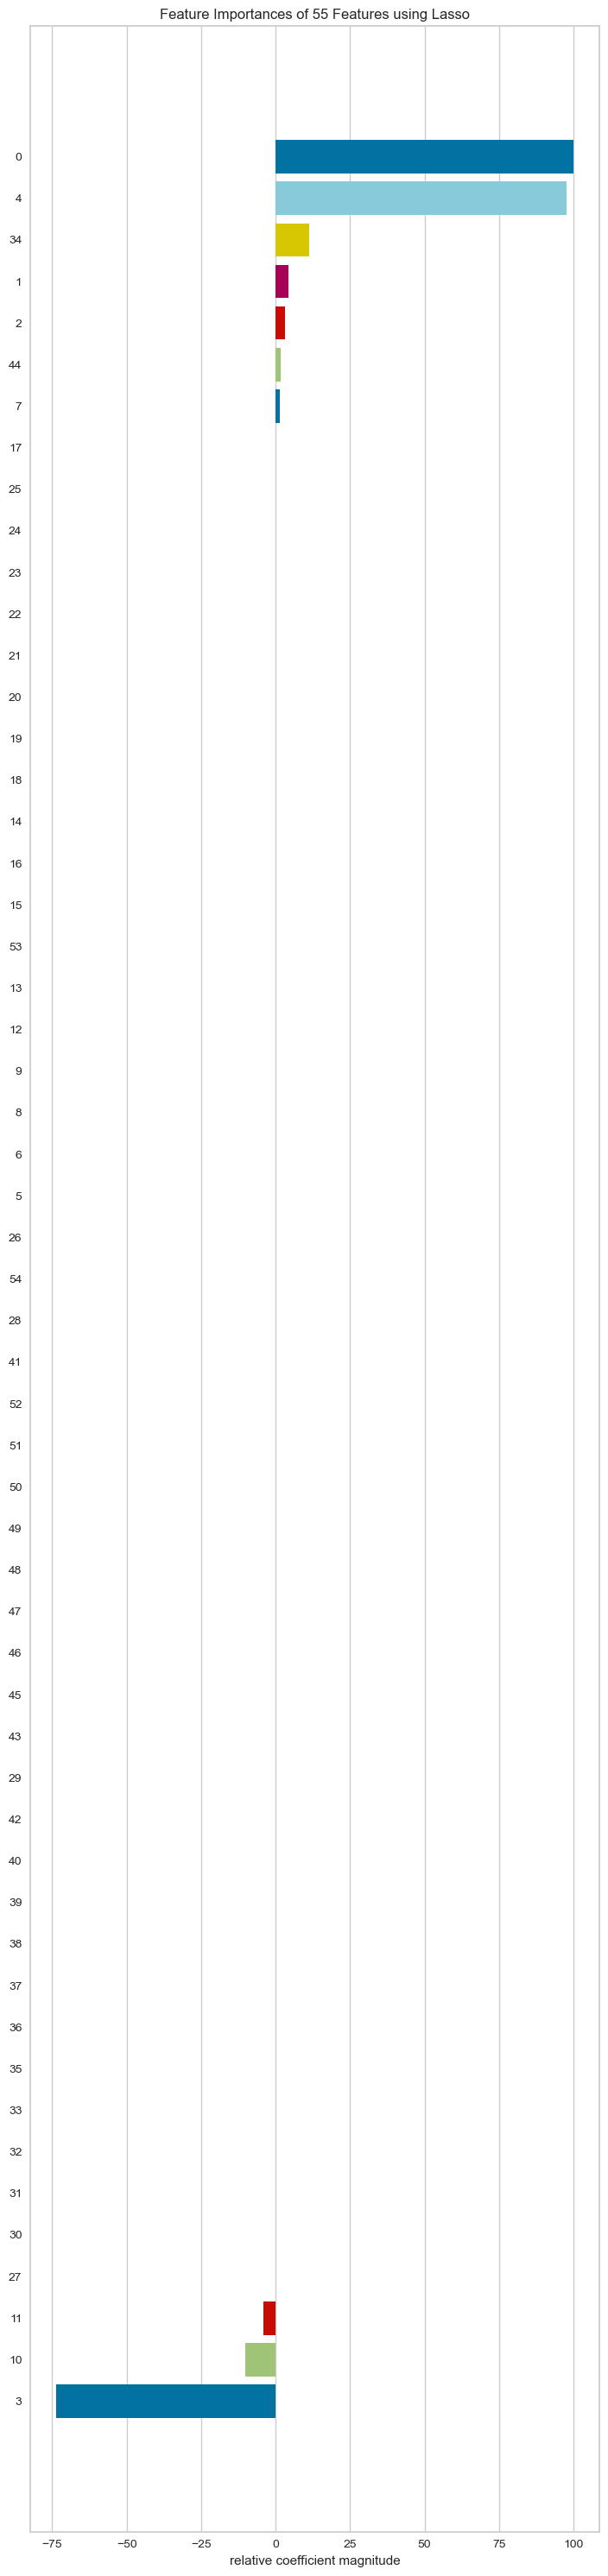

In [118]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# We put the model into the FeatureImportances function with the hyperparameter alpha=0.01, which gives the best score for the Lasso model.
# We give the columns names of the df as labels.

# We can make feature selection via lasso.

In [120]:
# Future Selection
X_new = pd.DataFrame(poly_features)[[0, 3, 4]]

# According to the image above, we choose the 3 most important feats. We assign it to the X_new variable.

In [122]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.3, random_state=101)

# We divide our new data with 3 features into train and test sets.

In [124]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

# train and test sets are scaled according to the train set information.

In [126]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaled2, y_train2)

# Whatever the best hyperparameters in the model we use for feature selection, //
# // we continue to use the same hyperparameters after the feature selection process.

Lasso(alpha=0.01)

In [128]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

# We get our predictions for the train and test set.

In [130]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

# We got pretty good scores compared to 3 feat.
# We got insight that there is no overfitting here.
# We do not forget that we will perform the confirmation process with cross validation.

,lasso_new_train,lasso_new_test
R2,0.984226,0.980674
mae,0.420986,0.521575
mse,0.415107,0.545617
rmse,0.644288,0.738659


In [132]:
lss # lasso scores before final model (with 55 features)

# although the coefficient of 10 features is different from 0; Even though the others are 0, there are 55 features in total.

,lasso_train,lasso_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


In [134]:
print(0.738659 / y.mean()) # with 3 feature
print(0.622302 / y.mean()) # with 55 feature

# Even though there was a difference of 0.01, we were able to approach the score of 55 features with fewer features.
# Therefore, we can continue with the model with 3 features.

0.052676698163665533
0.04437881975396684
